### Project Objectives
This project is to build a **Machine Learning Model** to assist a bank that has received loan applications than it typically receives to predict applicants who are eligible (Creditworthy) for the loan and those that are not.

Besides the prediction, the management team wants to know important features used  by the model for further decisons.

### Table of Content
1. [Data importation](#Data-importation)

2. [Exploratory data analysis, data cleaning, and Feature engineering](#2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering)

3. [Data preprocessing for modelling](#3.Data-preprocessing-for-modelling)

4. [Building different Classification models](#4.Building-of-Models)

5. [Model Evaluation](#5.Model-Evaluation-and-Comparison)

6. [Model selection](#6.Implementing-the-best-Best-model-with-test-data)

7. [Feature importance](#7.Feature-Importance)

8. [Summary](#8.Summary)

In [1]:
import warnings
warnings.filterwarnings('ignore')

#import packages 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

In [182]:
# Importing the needed classes for building models,validation, and metrics.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier 

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

###  Data importation  

In [4]:
#Impirt
df = pd.read_csv('/Users/chetanhalai/Documents/code base for projects/2) loan eligibility/Jethro CV Loan/data/LoansTrainingSetV2.csv')
print('The dataset contains {} rows, {} columns'.format(df.shape[0],df.shape[1]))

The dataset contains 111107 rows, 19 columns


### 2) Exploratory data analysis, data cleaning, and Feature engineering

In [5]:
#view the shape of the data
df.shape

(111107, 19)

In [6]:
##view the first 5 rows 
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [7]:
#view the columns
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Checking the data types of the different columns

In [8]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

COLUMN OBSERVATION 
* Monthly debt - should be a float but is an object 
* Maximum Open Credit - should be an integer but is an object
* Bankruptcies - should be categorical as it is binary 

#### CHECKING FOR MISSING VALUES 

In [9]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [10]:
# missing values in percentage wise
(df.isnull().sum()/len(df))*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    19.204911
Years in current job             4.223856
Home Ownership                   0.000000
Annual Income                   19.204911
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.104665
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.205208
Tax Liens                        0.009900
dtype: float64

MISSING VALUES OBSERVATION 
* credit score - 19.2% of the credit score data is missing 
* Annual Income - 19.2% of the Annual imcome fields are missing 
* Months since last delinquent - 53.1% of the data in this column is missing and i may have to consider dropping it 

* Bankruptcies - 0.2
* Tax Liens -  0.009900

      

#### Checking for duplicates 

In [11]:
df['Loan ID'].duplicated().sum()

22197

**Observation**

There appears to be 22197 duplicated values almost 20% of my dataset 


In [12]:
df[df.duplicated(subset = 'Loan ID', keep = False)].head(30)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5045,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Loan Given,99999999,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0
5052,251d5462-dd68-40a6-8873-72a3f1b747c5,b5e20377-0d19-4371-a2a1-38c186bba7fc,Loan Given,99999999,Short Term,716.0,5 years,Rent,30822.0,Other,395.55,14.6,23.0,11,0,3846,4808,0.0,0.0
5054,7dd7d80e-5e7e-4652-983d-d5ab5f2f605e,f2975012-90a9-4358-8bd6-2d5127363ac0,Loan Given,99999999,Short Term,660.0,10+ years,Home Mortgage,59070.0,Debt Consolidation,1235.55,13.3,NaN,16,0,28667,32283,0.0,0.0
5058,9e94886a-9102-4c06-ac3f-40ab2d0a66a3,b554204e-774e-42f8-a612-3cb8474e97ac,Loan Given,99999999,Short Term,724.0,10+ years,Own Home,44397.0,Debt Consolidation,1050.73,14.5,NaN,5,0,266,296,0.0,0.0
5062,adcc12e4-b325-4a38-b08d-82b1dd6870bd,3baae5b0-abf9-4638-bbbf-06ecb0585cd3,Loan Given,99999999,Short Term,709.0,3 years,Rent,32371.0,Debt Consolidation,399.25,10.0,NaN,7,0,7346,8603,0.0,0.0
5063,e4f0f089-ad01-4b8f-97f7-88e6f3683a6e,60d0a34d-f209-4eea-b5e0-a4a92b343c79,Loan Given,99999999,Long Term,711.0,10+ years,Rent,61032.0,Debt Consolidation,1342.7,14.2,NaN,12,0,35207,88684,0.0,0.0
5064,f563d4ad-9c45-4af4-a57b-d9c3a33a6da5,f26db1c7-0ed4-4ca1-8974-06d9a480dbc5,Loan Given,99999999,Short Term,707.0,10+ years,Home Mortgage,69496.0,Debt Consolidation,729.71,18.5,NaN,8,0,20165,26222,0.0,0.0
5065,146aa471-10b0-4a3a-afc7-d944ec300a69,35730afc-a9a4-4f7b-a7a0-b10966777d3b,Loan Given,99999999,Short Term,707.0,1 year,Own Home,341705.0,other,5267.95,26.0,NaN,19,0,61567,63933,0.0,0.0
5069,ed0a7d7b-fc5b-47a8-a37c-8d69cec1ca65,693beb2a-27f4-4965-9388-4dcf3b3701c7,Loan Given,99999999,Short Term,701.0,10+ years,Home Mortgage,50112.0,Debt Consolidation,851.91,16.2,NaN,9,1,7950,9816,1.0,0.0
5074,02fd58f6-59a5-4ac5-8a25-9e3be6bb1def,74037bfc-4918-4294-81e2-e11dcaa8cd92,Loan Given,99999999,Short Term,707.0,8 years,Rent,213696.0,Debt Consolidation,1816.42,18.8,NaN,6,0,19482,28072,0.0,0.0


In [13]:
df[df['Loan ID'] == 'a8f95a10-9405-4461-b7c7-58ba079e8bc2']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5137,a8f95a10-9405-4461-b7c7-58ba079e8bc2,d0a4507f-eca7-4948-b13a-791242fed30d,Loan Given,99999999,Short Term,724.0,< 1 year,Rent,48574.0,Debt Consolidation,708.38,14.9,NaN,10,0,19418,28264,0.0,0.0
90088,a8f95a10-9405-4461-b7c7-58ba079e8bc2,d0a4507f-eca7-4948-b13a-791242fed30d,Loan Given,8832,Short Term,724.0,< 1 year,Rent,48574.0,Debt Consolidation,708.38,14.9,NaN,10,0,19418,28264,0.0,0.0


In [14]:
df[df['Loan ID'] == 'bb983383-0aa0-4d13-9b7f-05f694672374']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5045,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Loan Given,99999999,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0
102512,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Loan Given,5972,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0


In [15]:
df.duplicated(subset = 'Loan ID').sum()

22197

**Observation**
Whilse inspiecting the duplicated data I noticed in the above LoanID (bb983383-0aa0-4d13-9b7f-05f694672374) that the loan amount of 999999999 must be bogus/tpying error - which is also present a numerous loand Id - 
This must be removed before verifying the duplicated records on Loan ID 

In [16]:
#df[df['Current Loan Amount'] == '99999999'].() - 
df = df[~(df['Current Loan Amount'] == 99999999)]

In [17]:
df[df['Loan ID'] == 'bb983383-0aa0-4d13-9b7f-05f694672374']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
102512,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Loan Given,5972,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0


**Observation**
Whilse i was intending to assess the duplicate, i notice '99999999' - which cannot be a correct loan amount - so prior to droping the duplicate - i chose to drop LoanID associuated with the following figure 99999999. 
I will be now drop duplicates 


In [18]:
df.drop_duplicates(subset='Loan ID', keep='last', inplace=True)


In [19]:
df.duplicated(subset = 'Loan ID').sum()

0

In [20]:
df.shape

(80594, 19)

**Observation**
now i have droped duplicated - we now have 80k rows to work with - I have over 20% faulty data in this dataset. 

## UNIVARIATE ANALAYSIS 

#### EXPLORING CATEGORICAL VARIABLES 

In [21]:
categorical_var = df.select_dtypes(include = 'object') 
numerical_var = df.select_dtypes(include = np.number)

In [22]:
# Categorical variables
for col in categorical_var.columns:
    print(col)

Loan ID
Customer ID
Loan Status
Term
Years in current job
Home Ownership
Purpose
Monthly Debt
Maximum Open Credit


Loan ID and Customer ID will be ignored in the analysis since they are just identity variables and will be redundant to the our models

###  Creating a function to explore the categorical variables

To easily explore the explore, the categorical variables a function created to give a quick numerical and graphical summary.

In [23]:
def explore_cat(df,col):
    '''
    This function return a summary of a categorical variable
    
    '''
    unique_categories = df[col].nunique()   #count the number of unique valuess in a column - then assign it to a unique varibale (unique_categories)
    if unique_categories <=5:
        print('Summary')
        print('==========')
        print(df[col].describe(),'\n')
        sns.countplot(x=col,data=df)
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[col].value_counts(),'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[col].isnull().sum()))
    else:
        print('Summary')
        print('==========')
        print(df[col].describe(),'\n')
        sns.countplot(y=col,data=df)
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[col].value_counts(),'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[col].isnull().sum()))



#### LOAN STATUS

Summary
count          80594
unique             2
top       Loan Given
freq           55421
Name: Loan Status, dtype: object 



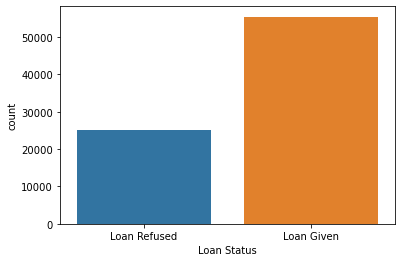

Value counts 

Loan Given      55421
Loan Refused    25173
Name: Loan Status, dtype: int64 

Missing values: 0


In [24]:
explore_cat(df,'Loan Status')

**Observation**

There are more loans given than loan refuse above 80% - and 0 missing data in this column . This is going to cause imbalnce in my target variable later 

#### TERM

Summary
count          80594
unique             2
top       Short Term
freq           59420
Name: Term, dtype: object 



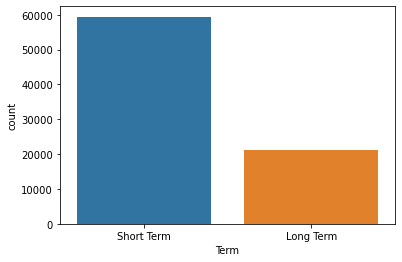

Value counts 

Short Term    59420
Long Term     21174
Name: Term, dtype: int64 

Missing values: 0


In [25]:
explore_cat(df,'Term')

**Observation**

A vast majority of the loans are short loans - over 75% - but there appears to be no missing values. 

#### Year in current Job 

Summary
count         77085
unique           11
top       10+ years
freq          24834
Name: Years in current job, dtype: object 



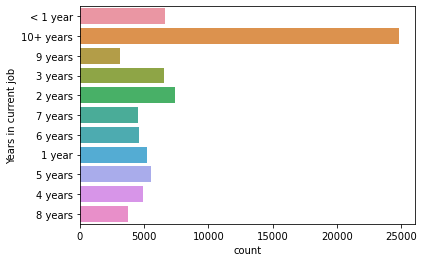

Value counts 

10+ years    24834
2 years       7367
< 1 year      6625
3 years       6579
5 years       5512
1 year        5239
4 years       4947
6 years       4599
7 years       4503
8 years       3736
9 years       3144
Name: Years in current job, dtype: int64 

Missing values: 3509


In [26]:
explore_cat(df,'Years in current job')

**Observation**

Most of the the data set consist of people being in there current job for over 10+ years (30%+), and this particular categorical variable will need to be worked on 
as it has 4000+ missing values - There appears to be too many categories (11) - I may consider cobverging these categories into 6 bins 

***Intension***

We will now binn the 11 categories into 6 bins so the data is easier to work with - and address the missing values 


In [27]:
df['Years in current job'].fillna('10+ years', inplace=True)

In [28]:
df['Years in current job'].isnull().sum()

0

**Observation**
I filled the missing values with 10+ years because this is a categoricall value i could not uses mean/median - I opted to use the fillna function to prevent a disturbance in the distribution 

In [29]:
less_and_1= ['< 1 year','1 year'] # 1
two_three = ['3 years', '2 years'] #2
five_four =['5 years', '4 years'] # 
seven_six = ['7 years', '6 years']
eight_nine = ['9 years', '8 years']
new_cats = []
for value in df['Years in current job'].values:
    if value in less_and_1:
        new_cats.append('one or less year')
    elif value in two_three:
        new_cats.append('two or three years')
    elif value in five_four:
        new_cats.append('four or five years')
    elif value in seven_six:
        new_cats.append('six or seven years')
    elif value in eight_nine:
        new_cats.append('eight or nine years')
    else:
        new_cats.append(value)

In [30]:
df['Years in current job'] = new_cats

In [31]:
df['Years in current job'].head()

0       one or less year
1              10+ years
2    eight or nine years
3     two or three years
4              10+ years
Name: Years in current job, dtype: object

Summary
count         80594
unique            6
top       10+ years
freq          28343
Name: Years in current job, dtype: object 



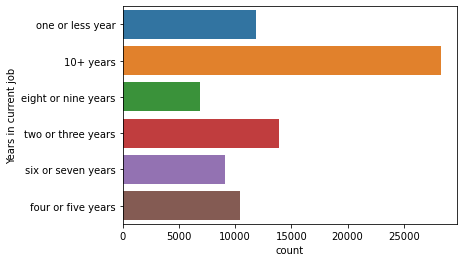

Value counts 

10+ years              28343
two or three years     13946
one or less year       11864
four or five years     10459
six or seven years      9102
eight or nine years     6880
Name: Years in current job, dtype: int64 

Missing values: 0


In [32]:
explore_cat(df,'Years in current job')

#### Home Ownership

Summary
count             80594
unique                4
top       Home Mortgage
freq              38944
Name: Home Ownership, dtype: object 



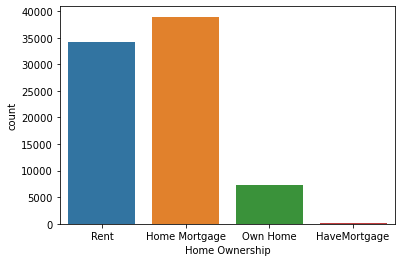

Value counts 

Home Mortgage    38944
Rent             34142
Own Home          7353
HaveMortgage       155
Name: Home Ownership, dtype: int64 

Missing values: 0


In [33]:
explore_cat(df,'Home Ownership')

**Observation**

There appear to be a similar disribution between people renting their homes and ones that have a morgage. There appears to be a typo this 'HaveMorgage' - so i will convert the 233 people to homemorgage
A significant amount of people that own homes have a morgage 

In [34]:
df['Home Ownership'].replace('HaveMortgage','Home Mortgage',inplace = True)

Summary
count             80594
unique                3
top       Home Mortgage
freq              39099
Name: Home Ownership, dtype: object 



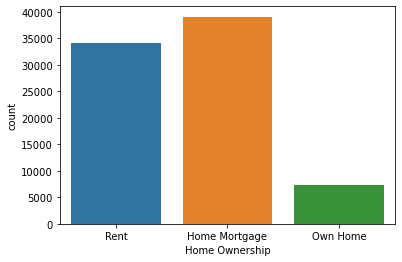

Value counts 

Home Mortgage    39099
Rent             34142
Own Home          7353
Name: Home Ownership, dtype: int64 

Missing values: 0


In [35]:
#verify everyhthing is verifies
explore_cat(df,'Home Ownership')

#### Purpose

Summary
count                  80594
unique                    16
top       Debt Consolidation
freq                   63746
Name: Purpose, dtype: object 



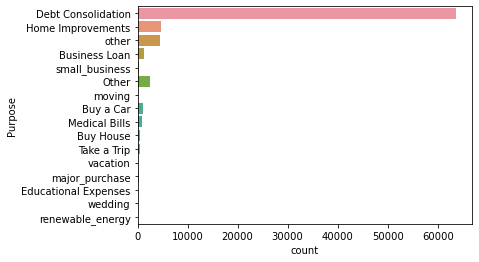

Value counts 

Debt Consolidation      63746
Home Improvements        4669
other                    4581
Other                    2567
Business Loan            1261
Buy a Car                1048
Medical Bills             873
Buy House                 515
Take a Trip               418
major_purchase            307
small_business            236
moving                    120
wedding                    84
Educational Expenses       82
vacation                   78
renewable_energy            9
Name: Purpose, dtype: int64 

Missing values: 0


In [36]:
explore_cat(df,'Purpose')

**Observation**

A vastmajority of the reason as to why loans were taken was for Debt Consolidation - 'other' and 'Other' appears to be a typo - both with be combined - 
categories need to be binned into 6 categories 


In [37]:
home_improvement = ['Home Improvements','moving']
business  = ['Business Loan','small_business']
luxury_purchase = [ 'major_purchase','wedding','Take a Trip','vacation','Buy House','Buy a Car']
essentials = ['Medical Bills','renewable_energy','Educational Expenses']
others = ['other','Other']
purpose_new = []

for value in df['Purpose'].values:
    if value in home_improvement:
        purpose_new.append('home_improvement')
    elif value in business:
        purpose_new.append('business')
    elif value in luxury_purchase:
        purpose_new.append('luxury_purchase')
    elif value in essentials:
        purpose_new.append('essentials')
    elif value in others:
        purpose_new.append('others')
    else:
        purpose_new.append(value)

In [38]:
df['Purpose'] = purpose_new

Summary
count                  80594
unique                     6
top       Debt Consolidation
freq                   63746
Name: Purpose, dtype: object 



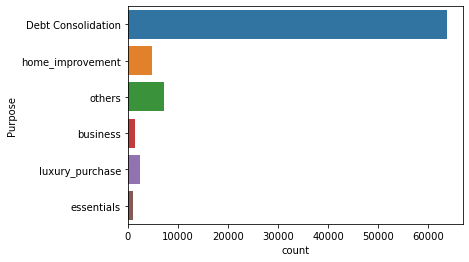

Value counts 

Debt Consolidation    63746
others                 7148
home_improvement       4789
luxury_purchase        2450
business               1497
essentials              964
Name: Purpose, dtype: int64 

Missing values: 0


In [39]:
explore_cat(df,'Purpose')

#### Monthly Debt


In [40]:
df['Monthly Debt'].nunique()

72008

In [41]:
df['Monthly Debt'].head()

0     777.39
1     892.09
2    1244.02
3     990.94
4     503.71
Name: Monthly Debt, dtype: object

**Observation**

The 'Monthly Debt' should be numeric not a categorical varibale - I will now convert it to a numeric varibale - the code below enables us to pick out the values that prohibited the column to be numeric in the first place 

In [42]:
# Find the indexes of missing values
numeric_monthly_debt = pd.to_numeric(df['Monthly Debt'],errors = 'coerce')
idx = numeric_monthly_debt.isnull()

# Print the relevant rows

print(df['Monthly Debt'][idx])


10     $1051.41
55      $157.15
105      $944.7
Name: Monthly Debt, dtype: object


In [43]:
monthly_debt_numeric = df['Monthly Debt'].apply(lambda x:re.findall(r'(\d+)',str(x))[0]).astype('int')

df['Monthly Debt'] = monthly_debt_numeric

**Observation**
We use reg-ex to take the $ out and convert the variable to a numeric variable 

In [44]:
df['Monthly Debt'].dtypes


dtype('int32')

In [45]:
df['Monthly Debt'].isnull().sum()

0

#### Maximum Open Credit

In [46]:
df['Maximum Open Credit'].nunique()

57185

In [47]:
df.shape

(80594, 19)

In [48]:
df['Maximum Open Credit'].head()

0     7946
1    77961
2    14815
3    43533
4    19553
Name: Maximum Open Credit, dtype: object

In [49]:
numeric_Open_Credit = pd.to_numeric(df['Maximum Open Credit'],errors = 'coerce')

# Find the indexes of missing values

idx = numeric_Open_Credit.isnull() 

# Print the relevant rows

print([idx])

[0         False
1         False
2         False
3         False
4         False
          ...  
111102    False
111103    False
111104    False
111105    False
111106    False
Name: Maximum Open Credit, Length: 80594, dtype: bool]


**Oberservation**

The pupose of the code above is was to inspectn why the 'Maximum Open Credit had initally been presented as an Object (categorical variable). So teh first line of code tries to convert it to a numberic variable whles setting the errors to coerce. this help us ideentoify the places where it could not convert to numberic, because those records were set as 'NaN' values. -- i will now drop these values ('4930', '37357 ') . After dropping them i converted it to a numerical varibale. 

In [50]:
df.drop([4930,37357],axis=0,inplace=True) #axis=0 implies dropping rows 

In [51]:
df.shape

(80592, 19)

In [52]:
# Changing the variable to numeric
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'])

In [53]:
df['Maximum Open Credit'].dtypes

dtype('int64')

In [54]:
df['Maximum Open Credit'].isnull().sum()

0

### Exploring numerical Variables 

In [55]:
for col in numerical_var.columns:
    print(col)

Current Loan Amount
Credit Score
Annual Income
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Bankruptcies
Tax Liens


In [56]:
numerical_var.isnull().sum()

Current Loan Amount                 0
Credit Score                    16089
Annual Income                   16089
Years of Credit History             0
Months since last delinquent    43602
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Bankruptcies                      171
Tax Liens                           8
dtype: int64

### Current Loan Amount 


In [57]:
def explore_num(df,col):
    '''
    This function will return numerical variables
    the col represents a numerical column
    '''
    print('Summary statistics \n')
    print(df[col].apply([len,min,max,np.median,np.mean,np.std]))
    print('===============================')
    print('Missing values:  {}'.format(df[col].isnull().sum()))
    print('============================\n')
    plt.figure(figsize = (8,4))

    #plotting a boxplot
    
    plt.subplot(1,2,1)
    plt.xlabel(df[col].name)
    plt.title('Boxplot')
    sns.boxplot(y=df[col])

    # plotting a histogram
    plt.subplot(1,2,2)
    sns.histplot(df[col],color='red',alpha=0.5)
    plt.title('Histogram')
    plt.tight_layout()
    plt.show()
    


Summary statistics 

len       80592.000000
min         491.000000
max       35875.000000
median    12058.000000
mean      13984.381837
std        8291.837569
Name: Current Loan Amount, dtype: float64
Missing values:  0



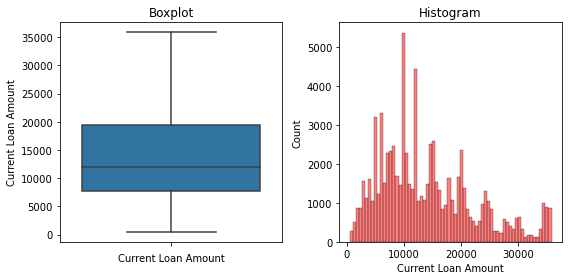

In [58]:
explore_num(df,'Current Loan Amount' )

**Observation**

There doesnt appear to be anything wrong with this column the data not have outliers , distribution looks normal and no missising values 

### Credit Score                    

Summary statistics 

len       80592.000000
min         585.000000
max        7510.000000
median      728.000000
mean       1217.727552
std        1718.062688
Name: Credit Score, dtype: float64
Missing values:  16088



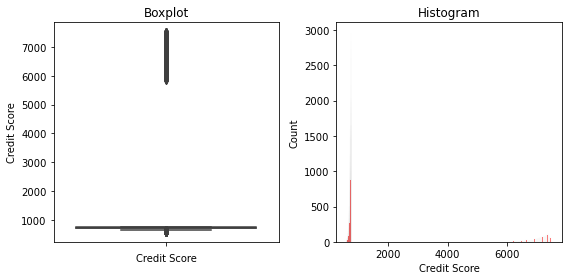

In [59]:
explore_num(df,'Credit Score')

**Observation**

There appears to be allot of missing data- and miss correly scewed data as credict scores in USA range between 300 - 850 usually rage between and we have max values of 7510. I will first address the missing values
, then screwed credit score range  range 

In [60]:
###

In [61]:
len(df[(df['Credit Score']>= 5500) & (df['Credit Score'] <= 7510)]['Credit Score'])

5043

In [62]:
df['Credit Score'].median()

728.0

**Observation**

The median was not provided in the above function and we trian an alternative method and got 726 - Our data has 5043 outliers - We will fill the missing values with teh median first . 



In [63]:
df['Credit Score'].fillna(df['Credit Score'].median(),inplace=True)

In [64]:
df['Credit Score'].isnull().sum()

0

Summary statistics 

len       80592.000000
min         585.000000
max        7510.000000
median      728.000000
mean       1119.966771
std        1549.457029
Name: Credit Score, dtype: float64
Missing values:  0



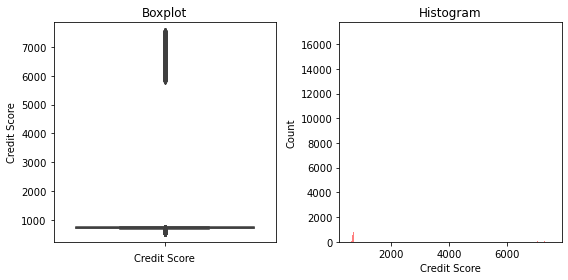

In [65]:
explore_num(df,'Credit Score')

**Observation**

This has impoved our data but there are still outlier affecting this particular feature - i will handle this during modeling 

### Annual Income   


Summary statistics 

len       8.059200e+04
min       4.033000e+03
max       8.713547e+06
median    6.131350e+04
mean      7.204061e+04
std       5.877521e+04
Name: Annual Income, dtype: float64
Missing values:  16088



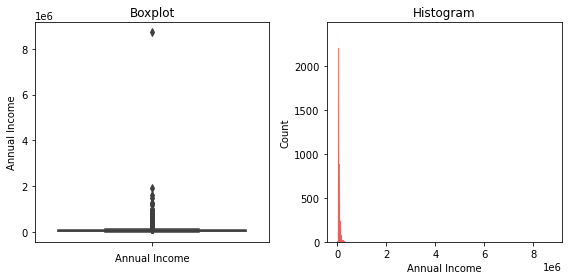

In [66]:
explore_num(df,'Annual Income')

In [67]:
df['Annual Income'].median()

61313.5

In [68]:
df['Annual Income'].fillna(df['Annual Income'].median(),inplace=True)
df['Annual Income'].isnull().sum()

0

Summary statistics 

len       8.059200e+04
min       4.033000e+03
max       8.713547e+06
median    6.131350e+04
mean      6.989923e+04
std       5.275700e+04
Name: Annual Income, dtype: float64
Missing values:  0



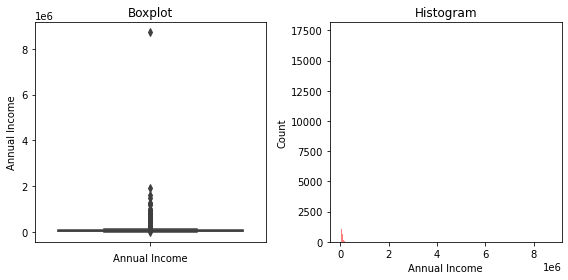

In [69]:
explore_num(df,'Annual Income')

***Observation***

This particular feature is fine if there are outlier values - so i just filled the data with the median values 

### Years of Credit History   

Summary statistics 

len       80592.000000
min           3.600000
max          70.500000
median       17.000000
mean         18.242664
std           7.029154
Name: Years of Credit History, dtype: float64
Missing values:  0



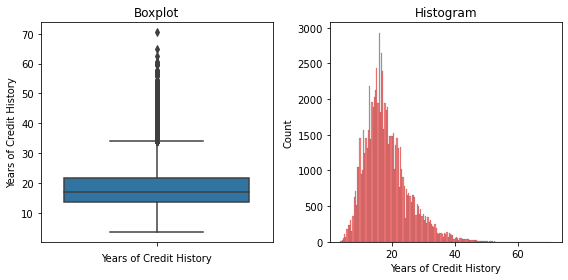

In [70]:
explore_num(df,'Years of Credit History')

### Months since last delinquent   

Summary statistics 

len       80592.000000
min           0.000000
max         176.000000
median       32.000000
mean         34.996594
std          21.997329
Name: Months since last delinquent, dtype: float64
Missing values:  43602



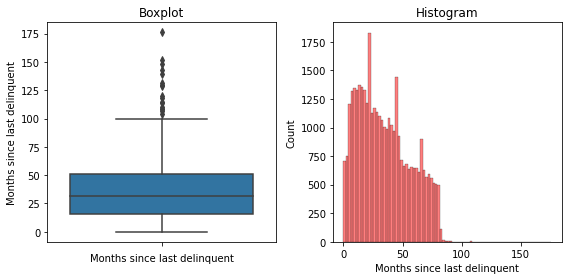

In [71]:
explore_num(df,'Months since last delinquent')

***Observation***

As there is between 40 - 50 % missing data - I wwill drop this column - later on 

### Number of Open Accounts             

Summary statistics 

len       80592.000000
min           0.000000
max          76.000000
median       10.000000
mean         11.116376
std           4.991469
Name: Number of Open Accounts, dtype: float64
Missing values:  0



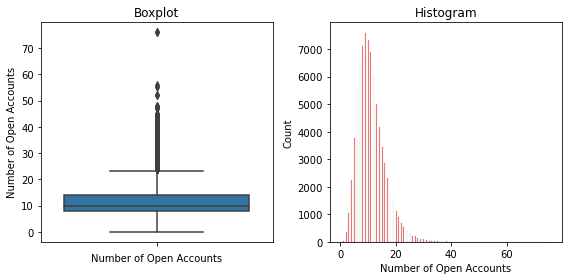

In [72]:
explore_num(df,'Number of Open Accounts')

In [73]:
len(df[(df['Number of Open Accounts']>= 25) & (df['Number of Open Accounts']<= 76)]['Number of Open Accounts'] ) 

1358

In [74]:
#
df.loc[df['Number of Open Accounts']>25,'Number of Open Accounts'] =25

Summary statistics 

len       80592.000000
min           0.000000
max          25.000000
median       10.000000
mean         11.056246
std           4.761443
Name: Number of Open Accounts, dtype: float64
Missing values:  0



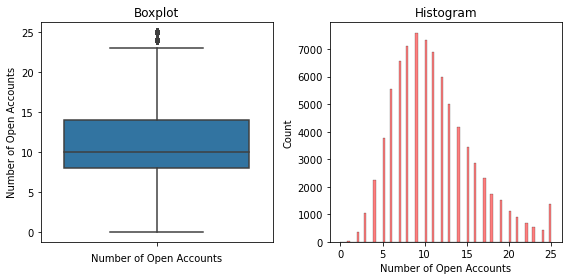

In [75]:
explore_num(df,'Number of Open Accounts')

***Observation***

In order to handle the outliers in thsi variable, all the accojunt aboge 25 , we converted to 25 . As a consequecne we have a much better reprensation and distrubtiom 

### Number of Credit Problems 

Summary statistics 

len       80592.000000
min           0.000000
max          15.000000
median        0.000000
mean          0.162671
std           0.478488
Name: Number of Credit Problems, dtype: float64
Missing values:  0



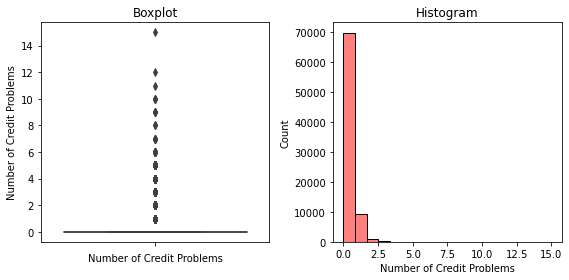

In [76]:
explore_num(df,'Number of Credit Problems')

In [77]:
sum(df['Number of Credit Problems']>3)

170

In [78]:
df.loc[df['Number of Credit Problems']>3,'Number of Credit Problems'] =3

Summary statistics 

len       80592.000000
min           0.000000
max           3.000000
median        0.000000
mean          0.158614
std           0.438432
Name: Number of Credit Problems, dtype: float64
Missing values:  0



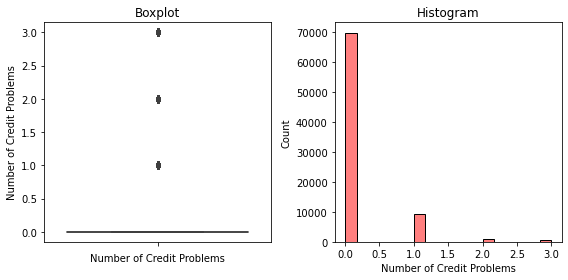

In [79]:
explore_num(df,'Number of Credit Problems')

***Observation 

Initally our max value for 'Number of Credit Problems' was 15 - to correct the outlier as asses how many credit problem existed between 3- 15. and converted all the 170 values between 3 - 15 to 3. 

As a consequence we got a better distribution 

### Current Credit Balance      

Summary statistics 

len       8.059200e+04
min       0.000000e+00
max       1.730472e+06
median    1.105000e+04
mean      1.541944e+04
std       1.963774e+04
Name: Current Credit Balance, dtype: float64
Missing values:  0



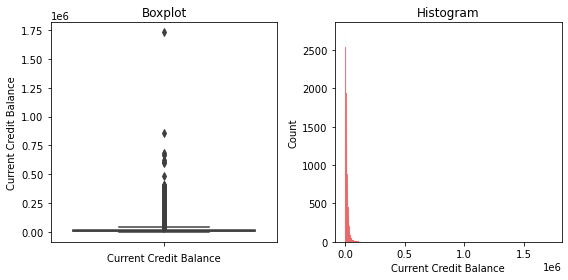

In [80]:
explore_num(df,'Current Credit Balance')

***Observation***
This will be handled during modelling 

### Bankruptcies                      

Summary statistics 

len       80592.000000
min           0.000000
max           7.000000
median        0.000000
mean          0.113565
std           0.345177
Name: Bankruptcies, dtype: float64
Missing values:  171



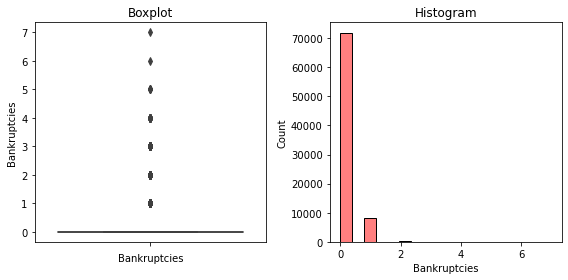

In [81]:
explore_num(df,'Bankruptcies')

In [82]:
df['Bankruptcies'].median()

0.0

In [83]:
### as there are 171 missing values in this bankrruptcy column - i will just convert them to 0
df['Bankruptcies'].isnull().sum()

171

In [84]:
df['Bankruptcies'].fillna(0, inplace=True)

In [85]:
df['Bankruptcies'].isnull().sum()

0

***Observation***

there were 171 missing values and i convert them to 0 - because the mode value which was 0 

### Tax Liens 

Summary statistics 

len       80592.000000
min           0.000000
max          15.000000
median        0.000000
mean          0.028864
std           0.261177
Name: Tax Liens, dtype: float64
Missing values:  8



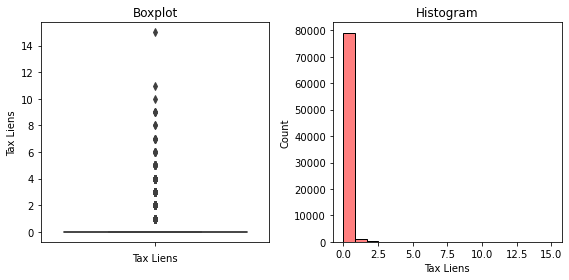

In [86]:
explore_num(df,'Tax Liens')

In [87]:
df['Tax Liens'].median()

0.0

In [88]:
df['Tax Liens'].fillna(0, inplace=True)

In [89]:
df['Tax Liens'].isnull().sum()

0

***Observation***

there were 8 missing values and i convert them to 0 - because the mode value which was 0 

### Explore Converted Numerical Varaibles (Monthly Debt and )

Summary statistics 

len       80592.000000
min           0.000000
max       22939.000000
median      848.000000
mean        966.198494
std         638.460660
Name: Monthly Debt, dtype: float64
Missing values:  0



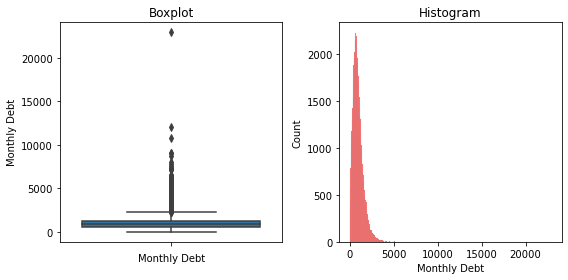

In [90]:
explore_num(df,'Monthly Debt')

***Observation***

Nothing needed to be done here - was converted to numerical variable early on (initally categorical varibale)

Summary statistics 

len       8.059200e+04
min       0.000000e+00
max       6.998809e+07
median    2.150050e+04
mean      3.588917e+04
std       4.236354e+05
Name: Maximum Open Credit, dtype: float64
Missing values:  0



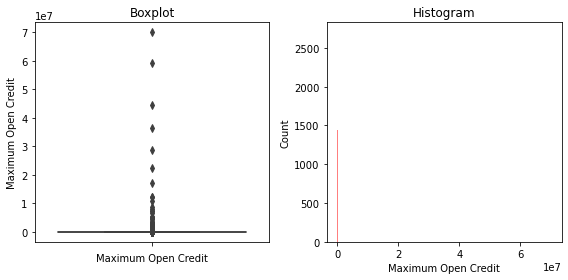

In [91]:
explore_num(df,'Maximum Open Credit')

***observation***

The valuesa re big and are being converted to scientific notations - This will be handled by the modelse

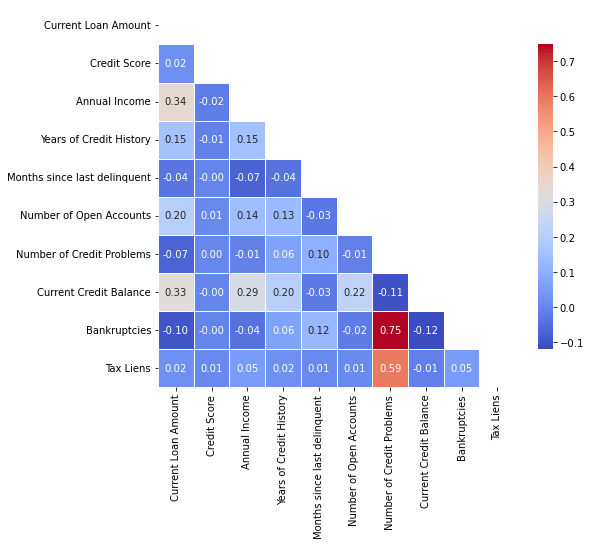

In [92]:
# creating a mask to keep only the half of the correlation table
cor = numerical_var.corr()    #callcualte the correlation amonst the numerical variables
mask = np.triu(np.ones_like(cor,dtype=bool))    #np.trui will print half the values and discard where it is repeated 

plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,mask=mask,
            cmap = 'coolwarm',
            linewidths=1,fmt=".2f",
            cbar_kws={"shrink": .8})
plt.show()

***Observation***

- There is a high correlation between banrupcy and numer of credit problems - 
- There is a high correlation between Tax Leins and numer of credit problems -

I may drop one of these colums during the modelling 

### Inspecting the cleaned dataset

In [93]:
for col in df.columns:
    print(col)

Loan ID
Customer ID
Loan Status
Current Loan Amount
Term
Credit Score
Years in current job
Home Ownership
Annual Income
Purpose
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens


In [94]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                      int32
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [95]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job                0
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    43602
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

# Data Prepreocessing for modelling 

### Dropping less important variables for building the models based the Exploratory Data Analysis

In [96]:
df.drop(['Loan ID', 'Customer ID','Months since last delinquent'], axis=1, inplace=True)

In [97]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

### Changing the target variable to a dummy variable 

In [98]:
df['Loan Status'] = df['Loan Status'].replace({'Loan Given':1,'Loan Refused':0})

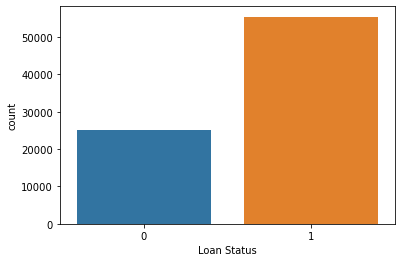

In [99]:
sns.countplot(df['Loan Status'])

plt.show()

### Changing the categorical features into dummy variables

In [100]:
df = pd.get_dummies(df,columns =['Term',
                                       'Years in current job',
                                       'Home Ownership',
                                       'Purpose'],
                       drop_first = True )

In [101]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Years in current job_one or less year,Years in current job_six or seven years,Years in current job_two or three years,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business,Purpose_essentials,Purpose_home_improvement,Purpose_luxury_purchase,Purpose_others
0,0,12232,7280.0,46643.0,777,18.0,12,0,6762,7946,...,1,0,0,0,1,0,0,0,0,0
1,0,25014,7330.0,81099.0,892,26.7,14,0,35706,77961,...,0,0,0,0,0,0,0,0,0,0
2,0,16117,7240.0,60438.0,1244,16.7,11,1,11275,14815,...,0,0,0,0,0,0,0,1,0,0
3,0,11716,7400.0,34171.0,990,10.0,21,0,7009,43533,...,0,0,1,0,1,0,0,0,0,0
4,0,9789,6860.0,47003.0,503,16.7,13,1,16913,19553,...,0,0,0,0,0,0,0,1,0,0


In [102]:
df.dtypes

Loan Status                                   int64
Current Loan Amount                           int64
Credit Score                                float64
Annual Income                               float64
Monthly Debt                                  int32
Years of Credit History                     float64
Number of Open Accounts                       int64
Number of Credit Problems                     int64
Current Credit Balance                        int64
Maximum Open Credit                           int64
Bankruptcies                                float64
Tax Liens                                   float64
Term_Short Term                               uint8
Years in current job_eight or nine years      uint8
Years in current job_four or five years       uint8
Years in current job_one or less year         uint8
Years in current job_six or seven years       uint8
Years in current job_two or three years       uint8
Home Ownership_Own Home                       uint8
Home Ownersh

In [103]:
df.shape

(80592, 25)

In [104]:
df.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Years in current job_one or less year,Years in current job_six or seven years,Years in current job_two or three years,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business,Purpose_essentials,Purpose_home_improvement,Purpose_luxury_purchase,Purpose_others
count,80592.000000,80592.000000,80592.000000,8.059200e+04,80592.000000,80592.000000,80592.000000,80592.000000,8.059200e+04,8.059200e+04,...,80592.000000,80592.000000,80592.000000,80592.000000,80592.000000,80592.000000,80592.000000,80592.000000,80592.000000,80592.000000
mean,0.687674,13984.381837,1119.966771,6.989923e+04,966.198494,18.242664,11.056246,0.158614,1.541944e+04,3.588917e+04,...,0.147211,0.112939,0.173032,0.091237,0.423615,0.018575,0.011961,0.059423,0.030400,0.088694
std,0.463445,8291.837569,1549.457029,5.275700e+04,638.460660,7.029154,4.761443,0.438432,1.963774e+04,4.236354e+05,...,0.354318,0.316520,0.378277,0.287948,0.494134,0.135019,0.108713,0.236416,0.171686,0.284303
min,0.000000,491.000000,585.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7810.750000,714.000000,4.892975e+04,534.000000,13.500000,8.000000,0.000000,5.949000e+03,1.261375e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12058.000000,728.000000,6.131350e+04,848.000000,17.000000,10.000000,0.000000,1.105000e+04,2.150050e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,19493.250000,740.000000,7.884575e+04,1254.000000,21.700000,14.000000,0.000000,1.929400e+04,3.597900e+04,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,35875.000000,7510.000000,8.713547e+06,22939.000000,70.500000,25.000000,3.000000,1.730472e+06,6.998809e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A general inspection of the descriptive statistics above indicates that variables have different scales which may cause models to put more weight on those with high values at the expense of those with low values.

To resolve this, the variables may or may not be scaled depending on the kind of algorithm that is used.

### Seperating the data into target variable and predictors

In [105]:
# predictors
X = df.drop('Loan Status',axis = 1)

# Target variable
y = df['Loan Status']

In [106]:
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Years in current job_one or less year,Years in current job_six or seven years,Years in current job_two or three years,Home Ownership_Own Home,Home Ownership_Rent,Purpose_business,Purpose_essentials,Purpose_home_improvement,Purpose_luxury_purchase,Purpose_others
0,12232,7280.0,46643.0,777,18.0,12,0,6762,7946,0.0,...,1,0,0,0,1,0,0,0,0,0
1,25014,7330.0,81099.0,892,26.7,14,0,35706,77961,0.0,...,0,0,0,0,0,0,0,0,0,0
2,16117,7240.0,60438.0,1244,16.7,11,1,11275,14815,1.0,...,0,0,0,0,0,0,0,1,0,0
3,11716,7400.0,34171.0,990,10.0,21,0,7009,43533,0.0,...,0,0,1,0,1,0,0,0,0,0
4,9789,6860.0,47003.0,503,16.7,13,1,16913,19553,1.0,...,0,0,0,0,0,0,0,1,0,0


In [107]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Loan Status, dtype: int64

### Splitting the data into train_set and test_set

In [108]:
#imported libraries 

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 0)

### Checking whether the target variable is balanced or not

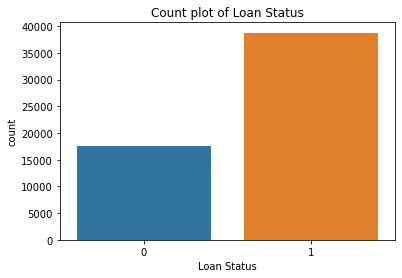

In [110]:
sns.countplot(y_train)
plt.title('Count plot of Loan Status')
plt.show()

**Observation**

The graph above shows that the classes target variable is not balanced.

This presupposes that accuracy would not be a good metric for measuring the performance of models built on this data.
Other metrics need to be employed in this case or the data should be balanced by employing a statiscal technique.

Such as:
* Confusions Matrix 
* f1 Score
* ROC 

# 4.Building-of-Models

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms.**

## Decision tree as a base model - 

**Decision tree classifier before hyperparameter tuning**

In [111]:
#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))

train accuracy: 1.00
test accuracy: 0.67


**Hyperparameter tuning for decision tree**

In [112]:
# Hyperparameter tuning using gridsearch and cross validation.

#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features': [10,13,15,24,20],'max_leaf_nodes':[10,13,15,17,20]}   #Create dictionary for the parameters :'max_features', 'max_leaf_nodes'
grid_tree = GridSearchCV(tree, param_grid = param_grid,cv =5)                  # Grid search will help retain the best values for the parameter , and pick the values for the parameter that will make the model perform well
grid_tree.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))
print('Best parameters:',grid_tree.best_params_)

Best cross-validation acuracy: 0.77
Best test score: 0.76
Best parameters: {'max_features': 11, 'max_leaf_nodes': 13}


**Decision tree classifier after hyperparameter tuning**

In [113]:
#Instantiating the model
tree = DecisionTreeClassifier(max_features=11,max_leaf_nodes=13, random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))

train accuracy: 0.77
test accuracy: 0.76


**Observation**

A train accuracy of 0.77 (77%) and a test accuracy of 0.76(76%) indicates that model is doing quiet well and  it is not overfitting.

Different models are built below in other to choose the best model.

# Logistic Regression

**Logistic Regression before hyperparameter tuning**

In [114]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))

train score: 0.75
test score: 0.75


**Hyperparameter tuning for Logistic Regression**

In [115]:
# Hyperparameter tuning
lr = LogisticRegression()
param_grid = {'C': [1,2,3,4,5,6,7,8,9,10,11]}     #specificy for C
grid_lgr = GridSearchCV(lr, param_grid, cv=5)
grid_lgr.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_lgr.best_score_))
print('Best test score: {:.2f}'.format(grid_lgr.score(X_test,y_test)))
print('Best parameters:',grid_lgr.best_params_)

Best cross-validation acuracy: 0.75
Best test score: 0.75
Best parameters: {'C': 4}


**Logistic Regression after hyperparameter tuning**

In [116]:
# Logistic regression with tuned hyper-parameters

lgr = LogisticRegression(C=4).fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))
lgr_y_pred =lgr.predict(X_test)

train score: 0.75
test score: 0.75


**Observation**

A train accuracy of 0.75 (57%) and a test accuracy of 0.75(75%) indicates that model is doing quiet well and  it is not overfitting.

Different models are built below in other to choose the best model.

## Xgboost  

**Xgboost classifier before hyperparameter tuning**

In [153]:
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)
print('train score: {:.2f}'.format(xgb_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(xgb_model.score(X_test,y_test)))

train score: 0.81
test score: 0.76


**Hyperparameter tuning for xgboost classifier**

In [181]:
# xgb = XGBClassifier(random_state = 0)
# param_grid = {'max_depth': [2,5,7,12,],'max_leaves':[9,13,15,17]}
# grid_xgb = GridSearchCV(rfc, param_grid = param_grid,cv =5)
# grid_xgb.fit(X_train,y_train)
# print('Best cross-validation acuracy: {:.2f}'.format(grid_xgb.best_score_))
# print('Best test score: {:.2f}'.format(grid_xgb.score(X_test,y_test)))
# print('Best parameters:',grid_xgb.best_params_)

**Xgboost classifier after hyperparameter tuning**

In [159]:
# xgboost with tuned Hyper-parameters
xgb = XGBClassifier(n_estimators=300, max_depth = 5,max_leaves=10)
xgb_model = xgb.fit(X_train,y_train)
xgb_y_pred = xgb_model.predict(X_test)
print('train score: {:.2f}'.format(xgb_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(xgb_model.score(X_test,y_test)))


train score: 0.83
test score: 0.76


## Random Forest

**Random Forest classifier before hyperparameter tuning**

In [120]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))

train score: 1.00
test score: 0.76


**Hyperparameter tuning for Random Forestclassifier**

In [121]:
# rfc = RandomForestClassifier(random_state = 0)
# param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
# grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
# grid_rfc.fit(X_train,y_train)
# print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
# print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
# print('Best parameters:',grid_rfc.best_params_)

**Random Forest  classifier after hyperparameter tuning**

In [122]:
rfc = RandomForestClassifier(max_features=20,max_leaf_nodes=20,random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_y_pred = rfc.predict(X_test)


train score: 0.77
test score: 0.77


## Gradient Boosting Classifier

**Gradient Boosting Classifier before hyperparameter tuning**

In [123]:
gbc = GradientBoostingClassifier(n_estimators=300,random_state=42)
gbc.fit(X_train,y_train)
print('Train accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_train,y_train)))
print('Test accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_test,y_test)))

Train accuracy of GradientBoosting Classifier: 0.775
Test accuracy of GradientBoosting Classifier: 0.766


**Hyperparameter for Gradient Boosting Classifier**

In [124]:
# gbc = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42)
# param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
# grid_gbc = GridSearchCV(gbc, param_grid = param_grid,cv =5)

# grid_gbc.fit(X_train,y_train)
# print('Best cross-validation acuracy: {:.2f}'.format(grid_gbc.best_score_))
# print('Best test score: {:.2f}'.format(grid_gbc.score(X_test,y_test)))
# print('Best parameters:',grid_gbc.best_params_)

**Gradient Boosting Classifier after hyperparameter tuning**

In [125]:
gbc = GradientBoostingClassifier(n_estimators=500,max_depth=5,max_features=15,max_leaf_nodes=15,random_state=42)
gbc.fit(X_train,y_train)
gbc_y_pred =gbc.predict(X_test) 
print('Train accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_train,y_train)))
print('Test accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_test,y_test)))


Train accuracy of GradientBoosting Classifier: 0.795
Test accuracy of GradientBoosting Classifier: 0.766


## Ada Boost Classifier

In [126]:
# Instantiate a decition tree classifier
dt=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=10,random_state=42)

# Instantiate an AdaBoost classifier
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=300,random_state=0)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train,y_train)
adb_y_pred = adb_clf.predict(X_test)
print('Train accuracy of AdaBoostClassifier: {:.3f}'.format(adb_clf.score(X_train,y_train)))
print('Test accuracy of AdaBoostClassifier: {:.3f}'.format(adb_clf.score(X_test,y_test)))

Train accuracy of AdaBoostClassifier: 0.804
Test accuracy of AdaBoostClassifier: 0.741


## Votting classifier

In [161]:
# Instantiate individual classifiers
Logr = LogisticRegression(random_state=42,C=6)
Dtr = DecisionTreeClassifier(max_features=10,max_leaf_nodes=5,random_state=42)

In [162]:
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', Logr),
('Classification Tree', Dtr)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
        #fit clf to the training set
        clf.fit(X_train,y_train)
        # Predict the labels of the test set
        y_pred = clf.predict(X_test)
        # Evaluate the accuracy of clf on the test set
        print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))



Logistic Regression : 0.750
Classification Tree : 0.738


##### Combining the Logistic Regression,Svc and the Decision tree classifier to form a stronger model using votting classifier

In [163]:

#Instantiating  votting classifier
vc = VotingClassifier(estimators=classifiers,voting = 'hard')

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train,y_train)
vc_y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier train accuracy: {:.3f} '.format(vc.score(X_train,y_train)))
print('Voting Classifier test accuracy: {:.3f}'.format(accuracy_score(y_test, vc_y_pred)))

Voting Classifier train accuracy: 0.745 
Voting Classifier test accuracy: 0.737


# 5.Model-Evaluation-and-Comparison

Different metrics are considered for evaluating and comparing the models.
Since the classes in the target variable (Loans status) is not balanced, 
accuracy is definetly not a good metric to rely on in this case hence will be used to only check for overfitting and underfitting.
Confusion matrix,F1 score,and Receiver Operation Curve will employed in evaluating and comparing the models.


### Accuracies and F1 scores 

In [164]:

# 1.Decision tree
dct_train_score =tree.score(X_train,y_train)
dct_test_score =tree.score(X_test,y_test)
dct_f1_score = f1_score(y_test,tree_y_pred)

# 2.Logistic regression
lgr_train_score = lgr.score(X_train,y_train)
lgr_test_score = lgr.score(X_test,y_test)
lgr_f1_score    =f1_score(y_test,lgr_y_pred)

# 3.xgboost classifier
xgb_train_score =xgb_model.score(X_train,y_train)
xgb_test_score=xgb_model.score(X_test,y_test)
xgb_f1_score=f1_score(y_test,xgb_y_pred)

# 4.Random Forest
rfc_train_score =rfc.score(X_train,y_train)
rfc_test_score=rfc.score(X_test,y_test)
rfc_f1_score=f1_score(y_test,rfc_y_pred)

# 5.Gradient Boost Classifier
gbc_train_score=gbc.score(X_train,y_train)
gbc_test_score=gbc.score(X_test,y_test)
gbc_f1_score=f1_score(y_test,gbc_y_pred)

# 6.Ada Boost
adb_train_score=adb_clf.score(X_train,y_train)
adb_test_score=adb_clf.score(X_test,y_test)
adb_f1_score=f1_score(y_test,adb_y_pred)

# 7.Votting classifier
vc_train_score=vc.score(X_train,y_train)
vc_test_score=vc.score(X_test,y_test)
vc_f1_score=ada_f1_score=f1_score(y_test,vc_y_pred)


#### Creating a DataFrame with Models,Accuracy Scores and F1_scores

In [169]:
Model =['Decision tree','Logistic regression','Random Forest','XGB','Votting classifier','Gradient Boost','Ada Boost']

Train_accuracy = [dct_train_score,lgr_train_score,vc_train_score,xgb_train_score,rfc_train_score,gbc_train_score,adb_train_score] 

Test_accuracy = [dct_test_score,lgr_test_score,xgb_test_score,vc_test_score,rfc_test_score,gbc_test_score,adb_test_score]

F1_score = [dct_f1_score,lgr_f1_score,vc_f1_score,xgb_f1_score,rfc_f1_score,gbc_f1_score,adb_f1_score]


### Creating the DataFrame

In [170]:
Accuracy_f1_score_report=pd.DataFrame({'Model':Model,
                                        'Train_accuracy':Train_accuracy,
                                        'Test_accuracy':Test_accuracy,
                                        'F1_score':F1_score},
                                       index=np.arange(1,8,1))

#Sorting by fi_score
Accuracy_f1_score_report.sort_values(by='F1_score',
                                     ascending=False,
                                     inplace=True,
                                     ignore_index=True)


Accuracy_f1_score_report.set_index('Model')

,Train_accuracy,Test_accuracy,F1_score
Model,,,
Votting classifier,0.766973,0.765200,0.852188
Decision tree,0.766831,0.764455,0.851727
Gradient Boost,0.795459,0.765531,0.849816
Logistic regression,0.749814,0.749690,0.845636
XGB,0.828287,0.737323,0.843648
Ada Boost,0.803559,0.741128,0.827732
Random Forest,0.745400,0.759161,0.824184


# Confusion matrix

### Calculating Confusion Matrix of the different models

In [171]:
vc_matrix = confusion_matrix(y_test,vc_y_pred,labels=[1,0])
rf_matrix = confusion_matrix(y_test,rfc_y_pred,labels=[1,0])
lr_matrix =  confusion_matrix(y_test,lgr_y_pred,labels=[1,0])
xgb_matrix = confusion_matrix(y_test,xgb_y_pred,labels=[1,0])
dc_matrix = confusion_matrix(y_test,tree_y_pred,labels=[1,0])
gb_matrix = confusion_matrix(y_test,gbc_y_pred,labels=[1,0])
ab_matrix = confusion_matrix(y_test,adb_y_pred,labels=[1,0])

In [172]:
### Creating a function to plot confusion matrix 

def plot_metric(confusion, name,color_map):
    plt.figure(figsize = (8,7))
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    
    group_percentages = ["{0:.1%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    
    #Getting the labels
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    
    #Setting the labels
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap=color_map)
    ax.set_title(f'{name}\n',fontdict={'fontsize':25});
    ax.set_xlabel('\nPredicted Values',fontsize=16)
    ax.set_ylabel('Actual Values ',fontsize=16);
    
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Not Given','Given'],fontsize=15)
    ax.yaxis.set_ticklabels(['Not Given','Given'],fontsize=15)
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()


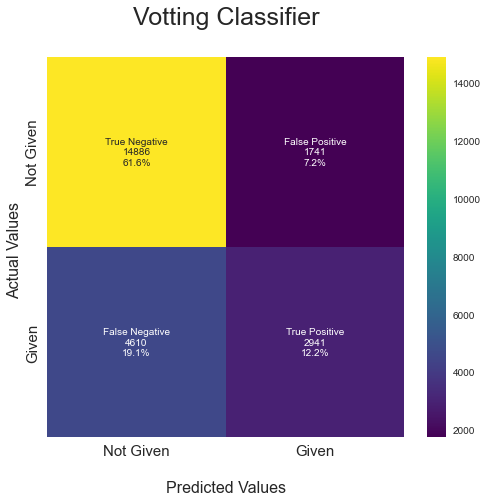

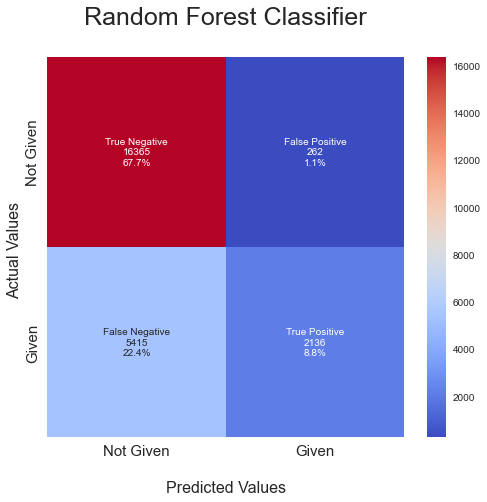

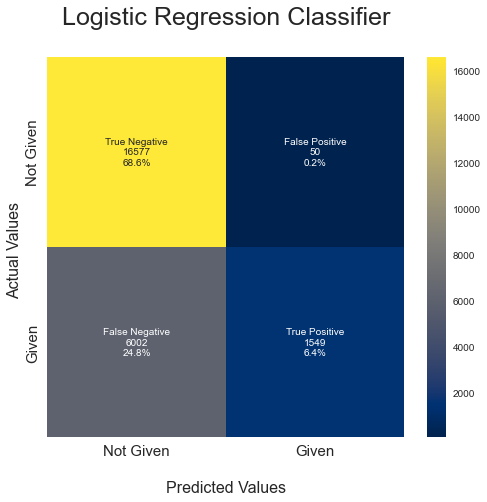

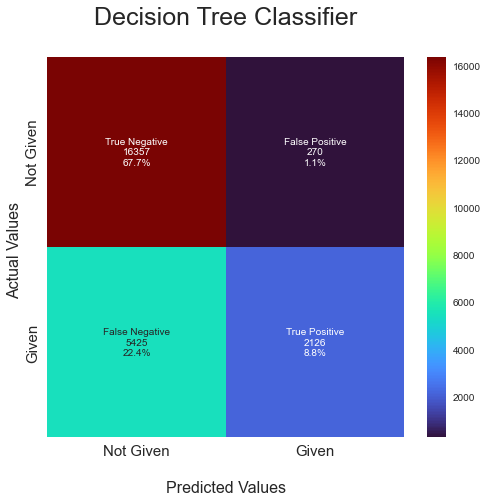

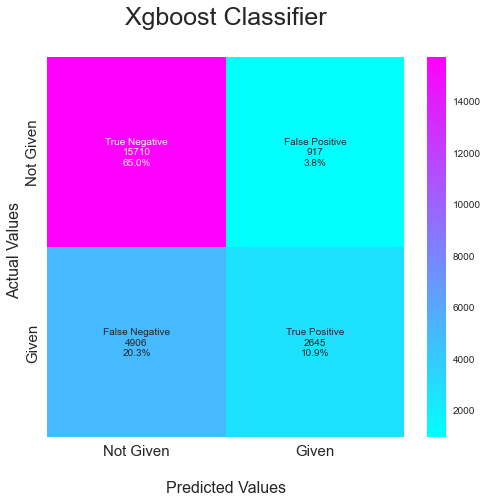

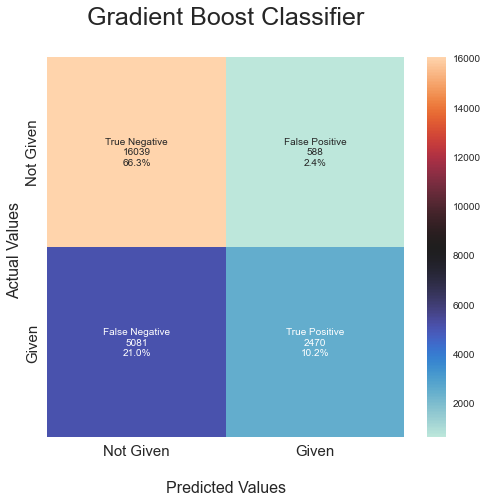

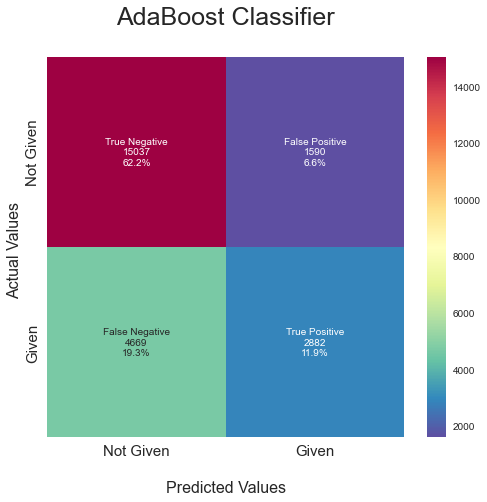

In [173]:
plot_metric(vc_matrix,'Votting Classifier','viridis')

plot_metric(rf_matrix,'Random Forest Classifier','coolwarm')

plot_metric(lr_matrix,'Logistic Regression Classifier','cividis')

plot_metric(dc_matrix,'Decision Tree Classifier','turbo')

plot_metric(xgb_matrix,'Xgboost Classifier','cool')

plot_metric(gb_matrix,'Gradient Boost Classifier','icefire')

plot_metric(ab_matrix,'AdaBoost Classifier','Spectral_r')


In [176]:
### ROC Curve

# predict probabilities
pred_prob_dct = tree.predict_proba(X_test)
pred_prob_lgr = lgr.predict_proba(X_test)
pred_prob_xgb = xgb_model.predict_proba(X_test)
pred_prob_rfc = rfc.predict_proba(X_test)
pred_prob_gb = gbc.predict_proba(X_test)
pred_prob_adb = adb_clf.predict_proba(X_test)

In [177]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_dct[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_lgr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_xgb[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_gb[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_adb[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

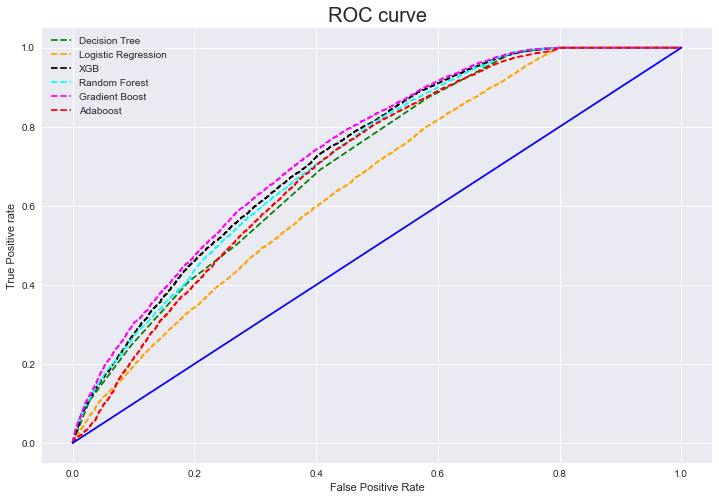

In [178]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='XGB')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='Gradient Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='Adaboost')
plt.plot(p_fpr, p_tpr, color='blue')
# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# The best model

Considering the ROC curve the Gradient boost appears to be the best model. since management is concerned about feature imortantce i will extract, the importance features that were used by the model. 


## 7.Feature-Importance

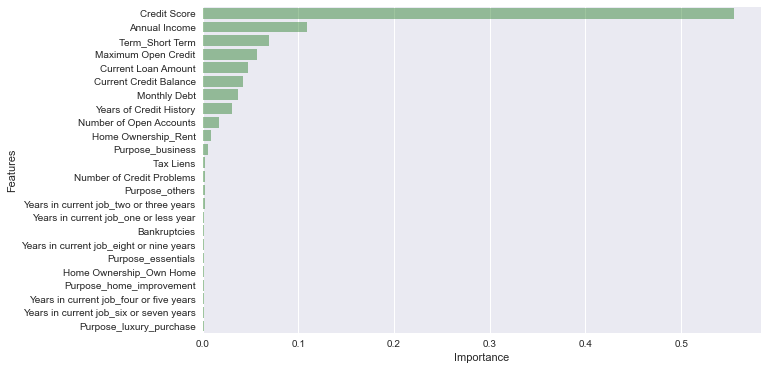

In [180]:
gbc.feature_importances_

Feature_importance=pd.DataFrame({'Features':X_train.columns,'Importance':gbc.feature_importances_})

Feature_importance = Feature_importance.sort_values(by = 'Importance',ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Features',data = Feature_importance, color = 'g',alpha = 0.4)
plt.show()



From the plot above, the first six importance featyres include:

1. Credit Score
2. Annual Income
3. Term (short term in particular)
4. Maximum Open Credit
5. Current Loan Amount
6. Current Credit Balance
    

### SUMMARY


These are the features that determine whether or not the customer got a loan or . from the graph above it show that credit score and Annual income where the biggest determinant of whether or not someone got a loan. 

The following features also have an influenctial impact on whether or not a customer was able to attain a loan: 
* Term (short term in particular)/ 
* Maximum Open Credit/
* Current Loan Amount/
* Current Credit Balance 

NOTE: because the data was not balanced, accuracy was not used as a metric, rather the ROC and f1 score were used as the best metrics for model comparison and selection 